# Exercise 1

In [13]:
# Read pile data from csv-file
df_piles = pd.read_csv('piles.csv')

# Read steel profile data from csv-file
df_profiles = pd.read_csv('steel_profiles.csv')

# Merge dataframes on "Profile" column (similar to Excel VLOOKUP)
df_merged = df_piles.merge(df_profiles, on='Profile', how='left')

In [15]:
# Display first five rows of dataframe of steel profiles
df_profiles.head()

,Profile,h[mm],b[mm],Iy[mm4],Wel_y[mm3],g[kg/m]
0,HE100A,96,100,3490000,72.8,16.7
1,HE120A,114,120,6060000,106.0,19.9
2,HE140A,133,140,10300000,155.0,24.7
3,HE160A,152,160,16700000,220.0,30.4
4,HE180A,171,180,25100000,294.0,35.5


In [14]:
# Display dataframe of piles
df_piles

,Pile_type,Profile
0,P01,HE200A
1,P20,HE220A
2,P05,HE240B
3,P23,NaN
4,P04,HE200A
5,P01,HE300B


In [16]:
# Display merged dataframe 
df_merged

,Pile_type,Profile,h[mm],b[mm],Iy[mm4],Wel_y[mm3],g[kg/m]
0,P01,HE200A,190.0,200.0,36900000.0,389.0,42.3
1,P20,HE220A,210.0,220.0,54100000.0,515.0,50.5
2,P05,HE240B,240.0,240.0,112600000.0,938.0,83.2
3,P23,NaN,NaN,NaN,NaN,NaN,NaN
4,P04,HE200A,190.0,200.0,36900000.0,389.0,42.3
5,P01,HE300B,300.0,300.0,251700000.0,1680.0,117.0


# Exercise 2

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set filename for dataset of forces from an IBDAS shell element
filename = 'Crack_width_Seg7_y_direction.csv'

# Read CSV-file
df = pd.read_csv(filename, skip_blank_lines=True)

# Filter dataframe for load case and criterion for critical combination
criterion = 'max My'
df = df[df['Criterion'] == criterion]

df.head()

,Criterion,x[m],y[m],N[kN/m],M[kNm/m],w_k[mm]
2,max My,22.115,7.603,-459.6,66.1,0.002553
5,max My,22.250,7.603,-432.1,87.8,0.013417
8,max My,22.250,7.747,-443.1,80.9,0.009092
11,max My,22.115,7.747,-497.0,69.0,0.002068
14,max My,22.115,8.159,-522.5,56.7,0.000000


Text(142,0.5,'Global y-coordinate [m]')

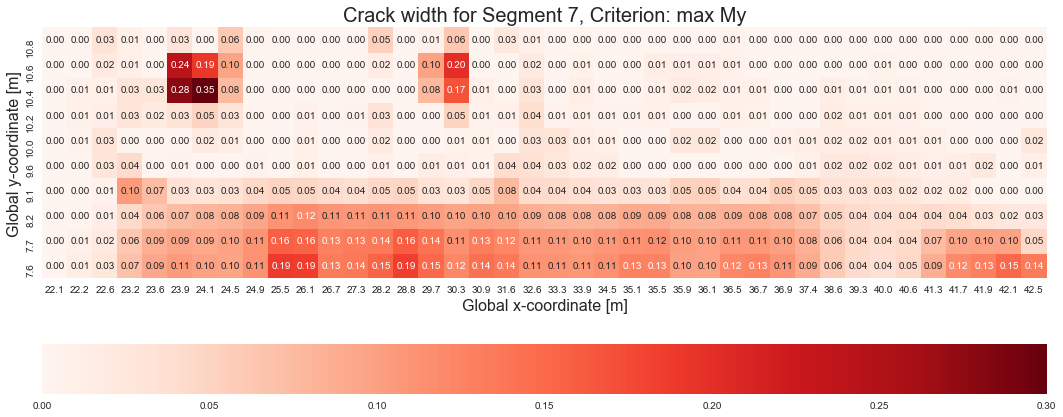

In [56]:
# Round dataframe coordinate columns
df['x[m]'] = round(df['x[m]'], 1)
df['y[m]'] = round(df['y[m]'], 1)

# Pivot data frame data into matrix form for heatmap plotting
pivot_final = df.pivot(index='y[m]', columns='x[m]', values='w_k[mm]').sort_index(ascending=False)

# Set max allowable crack with for concrete slab for use as max value of colorbar
vmax = 0.3

# Create figure
plt.figure(figsize=(18, 8))

# Plot heatmap wiht annotation
sns.heatmap(pivot_final, annot=True, annot_kws={'size': 10}, vmax=vmax,
                  fmt=".2f", square=True, cbar_kws={"orientation": "horizontal"}, cmap='Reds')

# Set titles and axes labels
plt.title(f'Crack width for Segment 7, Criterion: {criterion}', fontsize=20)
plt.xlabel('Global x-coordinate [m]', fontsize=16)
plt.ylabel('Global y-coordinate [m]', fontsize=16)

## Some extra stuff - Conditional coloring of values

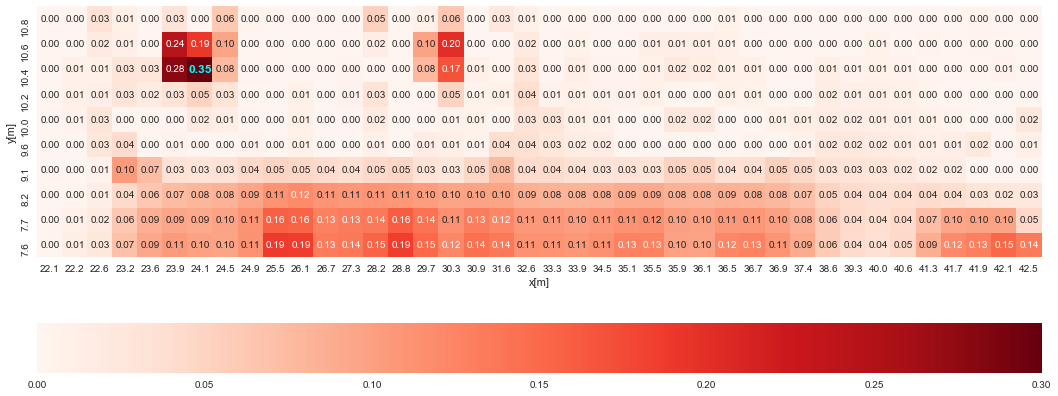

In [61]:

# Create figure
plt.figure(figsize=(18, 8))

# Plot heatmap wiht annotation, save axes object so it can be accessed later
ax = sns.heatmap(pivot_final, annot=True, annot_kws={'size': 10}, vmax=vmax,
                  fmt=".2f", square=True, cbar_kws={"orientation": "horizontal"}, cmap='Reds')

# --- Color values that exceed the max value ---

# Loop over all annotations of the axes object
for annot in ax.texts:
    
    # Annot will now be an object which prints 'Text(x, y, w_k)'
    
    # Extract the crack width part of the Text object and convert from string to float 
    wk = float(annot.get_text())
    
    # Set all values that exceed vmax to bold and a special color
    if wk > vmax: 
        annot.set_weight('bold')
        annot.set_color('cyan')
        annot.set_size(12)

plt.show()
